In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
def _make_missing_values_heatmap(data, data_name, index=None):
    """Create a heatmap to visualize missing values in a DataFrame."""
    if index is not None:
        data = data.set_index(index)

    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values in Dataset " + data_name)
    plt.show()


def _print_na_percentages_for_all_columns(df):
    for col in df.columns:
        na_percentage = round(df[col].isna().mean() * 100, 2)
        print(f'{col}: {na_percentage}% NA')


# First Descriptive Plots

In [22]:
data = pd.read_pickle("/Users/nicolasroever/Documents/Promotion/Unemployed_Work/unemployed_work/bld/python/data/psid_clean.pkl")

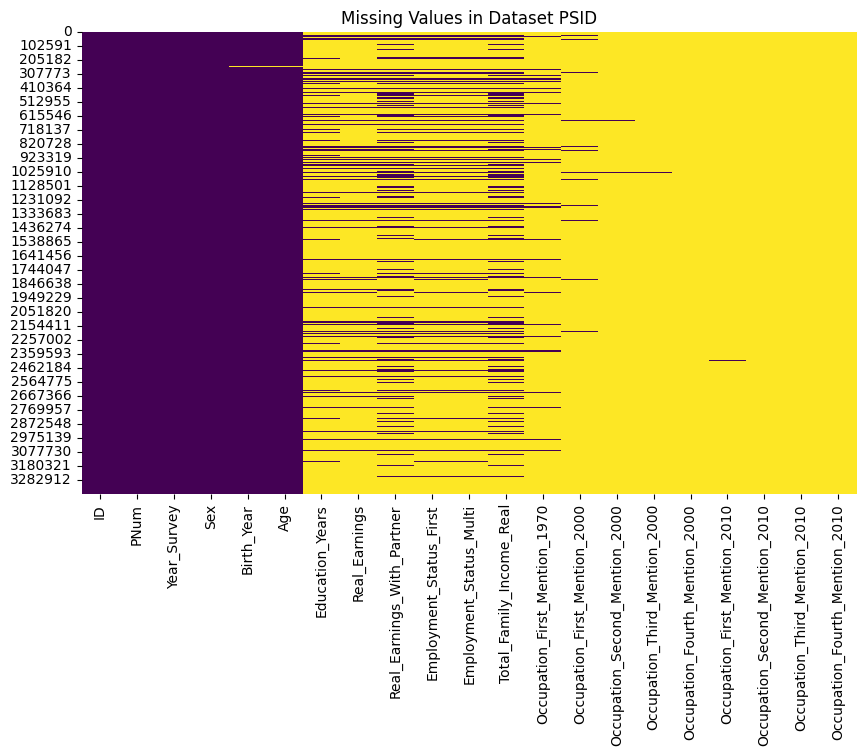

In [23]:
#_make_missing_values_heatmap(data, "PSID")

In [25]:
_print_na_percentages_for_all_columns(data)

ID: 0.0% NA
PNum: 0.0% NA
Year_Survey: 0.0% NA
Sex: 0.0% NA
Birth_Year: 0.17% NA
Age: 0.17% NA
Education_Years: 82.81% NA
Real_Earnings: 85.94% NA
Real_Earnings_With_Partner: 74.49% NA
Employment_Status_First: 83.95% NA
Employment_Status_Multi: 83.95% NA
Total_Family_Income_Real: 74.44% NA
Occupation_First_Mention_1970: 93.18% NA
Occupation_First_Mention_2000: 97.82% NA
Occupation_Second_Mention_2000: 99.37% NA
Occupation_Third_Mention_2000: 99.84% NA
Occupation_Fourth_Mention_2000: 99.96% NA
Occupation_First_Mention_2010: 99.32% NA
Occupation_Second_Mention_2010: 99.79% NA
Occupation_Third_Mention_2010: 99.95% NA
Occupation_Fourth_Mention_2010: 99.99% NA


# Understand Real Earnings

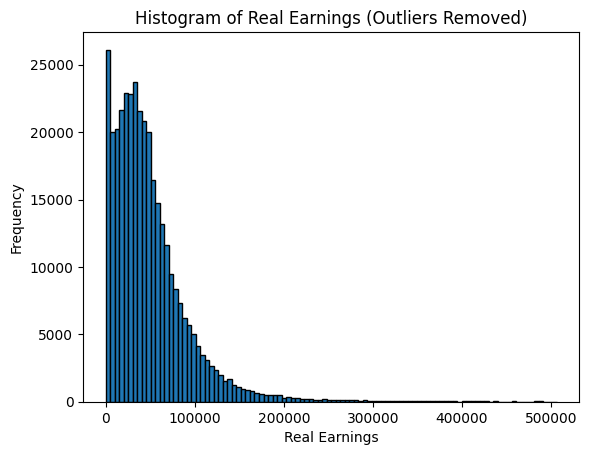

In [31]:
Q1 = data['Real_Earnings'].quantile(0.01)
Q3 = data['Real_Earnings'].quantile(0.99)
IQR = Q3 - Q1


# Only keep rows in the data frame where the 'Real_Earnings' column is not an outlier and not zero
filtered_data = data[~((data['Real_Earnings'] < (Q1 - 1.5 * IQR)) | (data['Real_Earnings'] > (Q3 + 1.5 * IQR))) & (data['Real_Earnings'] > 0)] 

plt.hist(filtered_data['Real_Earnings'], bins=100, edgecolor='black')
plt.title('Histogram of Real Earnings (Outliers Removed)')
plt.xlabel('Real Earnings')
plt.ylabel('Frequency')
plt.show()

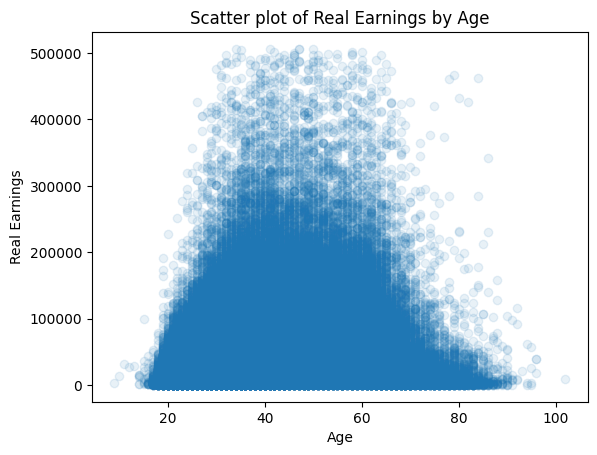

In [35]:
plt.scatter(filtered_data['Age'], filtered_data['Real_Earnings'], alpha=0.1)
plt.title('Scatter plot of Real Earnings by Age')
plt.xlabel('Age')
plt.ylabel('Real Earnings')
plt.show()

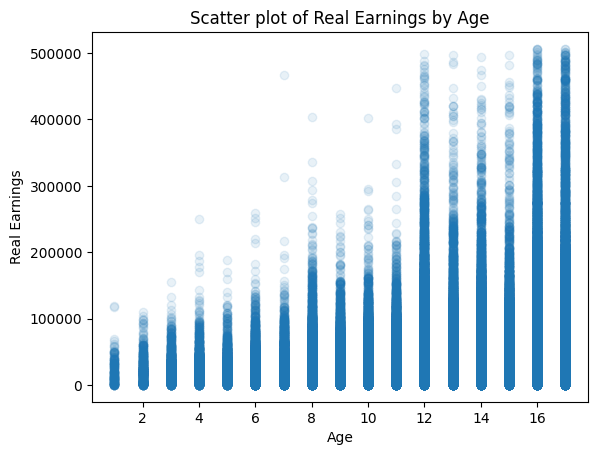

In [36]:
plt.scatter(filtered_data['Education_Years'], filtered_data['Real_Earnings'], alpha=0.1)
plt.title('Scatter plot of Real Earnings by Education Years')
plt.xlabel('Education Years')
plt.ylabel('Real Earnings')
plt.show()

/var/folders/f_/lhmm20kd6r979skh60tngks80000gn/T/ipykernel_11138/91156534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Education_Years_Bucket'] = pd.cut(filtered_data['Education_Years'], bins=np.arange(0, 21, 1), include_lowest=True)


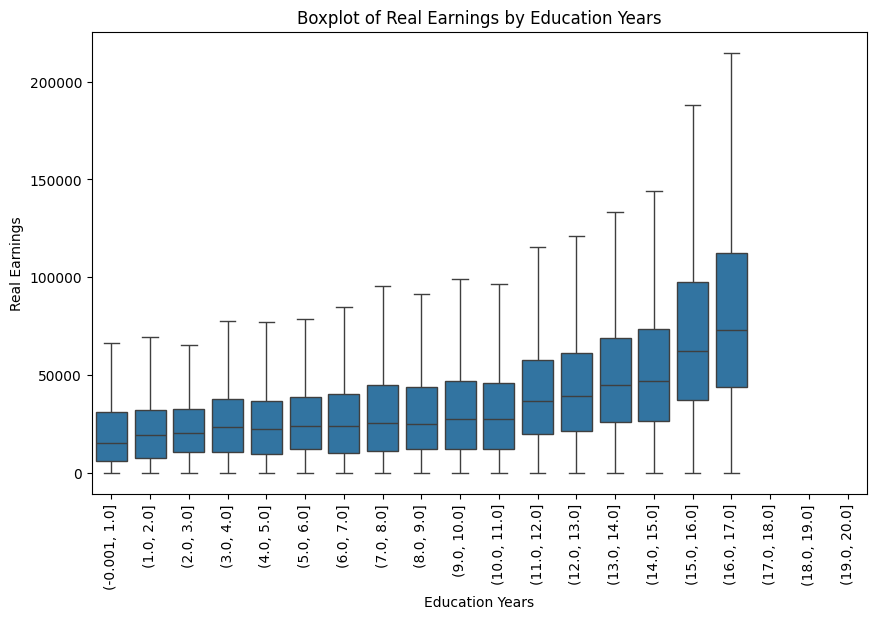

In [40]:

# Create a new column 'Education_Years_Bucket' that represents the bucket each row falls into
filtered_data['Education_Years_Bucket'] = pd.cut(filtered_data['Education_Years'], bins=np.arange(0, 21, 1), include_lowest=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Years_Bucket', y='Real_Earnings', data=filtered_data, 
            showfliers=False)
plt.title('Boxplot of Real Earnings by Education Years')
plt.xlabel('Education Years')
plt.ylabel('Real Earnings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Now, let's understand unemployment

In [41]:
data["Employment_Status_First"]

0          Not currently working
1          Not currently working
2                            NaN
3                            NaN
4                            NaN
                   ...          
3385488                      NaN
3385489                      NaN
3385490                      NaN
3385491                      NaN
3385492                      NaN
Name: Employment_Status_First, Length: 3385493, dtype: category
Categories (2, object): ['Not currently working' < 'Currently working']

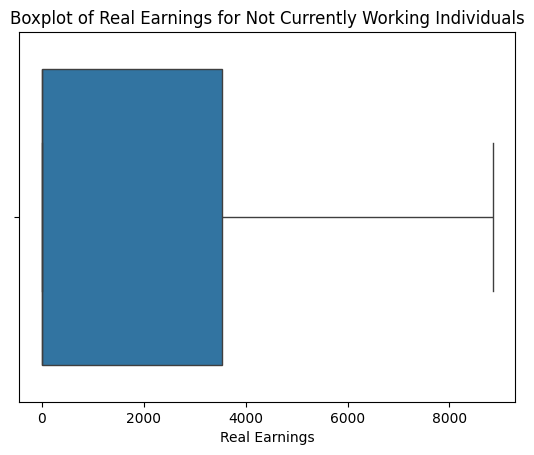

In [44]:
# Filter the DataFrame to only include individuals who are not currently working
not_working = data[data['Employment_Status_First'] == 'Not currently working']

# Create the boxplot
sns.boxplot(x=not_working['Real_Earnings'], 
            showfliers=False)
plt.title('Boxplot of Real Earnings for Not Currently Working Individuals')
plt.xlabel('Real Earnings')
plt.show()

In [49]:
sum((data["Real_Earnings"] > 10000 ) & (data['Employment_Status_First'] == 'Not currently working' )) / sum(data['Employment_Status_First'] == 'Not currently working')

0.13095803105295276